In [1]:
import numpy as np
import cv2
%matplotlib inline
from matplotlib import pyplot as plt

#Get Statistics of the video + Download Frames

In [7]:
import numpy as np
import cv2

file_path =r'D:\Jeffrey\IPython\1.OpenCV-1\Videos\Traffic\AVVS\AVSS\AVSS_E2.avi'

cap = cv2.VideoCapture(file_path)



counter=0
while (cap.isOpened()):
    # read the frame ; 
    #Docstring:   read([, image]) -> retval, image
    ret, frame = cap.read()
    
    
    # have to check, else error on the last frame.
    if ret==0:
        break
    
    #Create a string FrameNo ; store all the frames in C\Frames
    FrameNo = 'C:/Frames/'+'FrameNo'+str(counter)+'.png'
    #Save the frames
    cv2.imwrite(FrameNo,frame)
    
    
    counter = counter + 1
    
    #show the frame
    #Docstring:   imshow(winname, mat) -> None
    cv2.imshow('Window',frame)
    
    #control, press 'q' key to exit
    # Min cv2.waitKey(integer = min at 1) ; video will be fast ; increase integer value to slow the video    
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

#print video statistics ; before release of cap ; else no value
print "Frame Count   : ", cap.get(cv2.cv.CV_CAP_PROP_FRAME_COUNT)
print "Format        : ", cap.get(cv2.cv.CV_CAP_PROP_FORMAT)
print "Height        : ", cap.get(cv2.cv.CV_CAP_PROP_FRAME_HEIGHT)
print "Width         : ", cap.get(cv2.cv.CV_CAP_PROP_FRAME_WIDTH)
print "Mode          : ", cap.get(cv2.cv.CV_CAP_PROP_MODE)
print "Brightness    : ", cap.get(cv2.cv.CV_CAP_PROP_BRIGHTNESS)
print "Fourcc        : ", cap.get(cv2.cv.CV_CAP_PROP_FOURCC)
print "Contrast      : ", cap.get(cv2.cv.CV_CAP_PROP_CONTRAST)
print "FrameperSec   : ", cap.get(cv2.cv.CV_CAP_PROP_FPS)

#Get duration of the video
FrameCount = cap.get(cv2.cv.CV_CAP_PROP_FRAME_COUNT)
FrameperSecond =cap.get(cv2.cv.CV_CAP_PROP_FPS)
DurationSecond = FrameCount/FrameperSecond
if FrameperSecond>0:
    print "FrameDuration : ", DurationSecond, "seconds"


#when everything is done, release cap
cap.release()
cv2.destroyAllWindows()

Frame Count   :  4600.0
Format        :  0.0
Height        :  576.0
Width         :  720.0
Mode          :  0.0
Brightness    :  0.0
Fourcc        :  877677894.0
Contrast      :  0.0
FrameperSec   :  25.0
FrameDuration :  184.0 seconds


# Find the mask dimension to hide the train

Area of Interest :
[[280  80]
 [  0 300]
 [  0 500]
 [700 500]
 [700  80]]


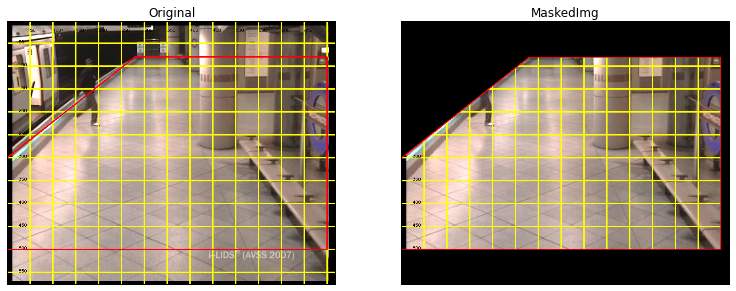

In [90]:
import numpy as np
import cv2
%matplotlib inline
from matplotlib import pyplot as plt

pathfile =r'D:\Jeffrey\IPython\1.OpenCV-1\Videos\Traffic\AVVS\AVSS\FrameNo88_Train.png'

#---------------------------------
# Load image
#---------------------------------
img_original = cv2.imread(pathfile)
cv2.imshow('original', img_original)

#---------------------------------
# Draw Markers + Get width and Height  + Break into 10 rows and columns
#---------------------------------

width = 720 ; 
height =576
# draw for every 50 


# Draw columns at 50 intervals, width step at 50, height from 0 to 576
col_interval=50
for i in range (0,width,col_interval):
    cv2.line(img_original,(i,0),(i,height),(255,255,0),2)
    cv2.putText(img_original,'%s'%(i), (i,col_interval/2),cv2.FONT_HERSHEY_SIMPLEX, 0.3, (0,0,0),thickness=1) #0.6 is the fontScale
cv2.imshow('markers_col',img_original)

#Draw rows at 50 interval
row_interval=50

for i in range(0,height,row_interval):
    cv2.line(img_original,(0,i),(width,i),(255,255,0),2)
    cv2.putText(img_original,'%s'%(i), (row_interval/2,i),cv2.FONT_HERSHEY_SIMPLEX, 0.3, (0,0,0),thickness=1) #0.6 is the fontScale
   
cv2.imshow('markers_col_row',img_original)


#---------------------------------
# Manually read the grid and park down the x, y of the area of interest + Draw the polygon to confirm the mask location
#---------------------------------

#First mask - which is whole image black
mask = np.zeros(img_original.shape[:2], dtype = "uint8") # (576, 720, 3), take (576,720) same height and width as the image
cv2.imshow('mask',mask) 


pts = np.array([[280,80],[0,300],[0,500],[700,500],[700,80]], np.int32)

#Docstring:   polylines(img, pts, isClosed, color[, thickness[, lineType[, shift]]]) -> None
cv2.polylines(img_original,[pts],True,(255,0,0),thickness=2)
cv2.imshow('AreaOfInterest',img_original)

print "Area of Interest :\n", pts

# Mask + white (255) + infill at '1'
#Docstring:   fillPoly(img, pts, color[, lineType[, shift[, offset]]]) -> None
cv2.fillPoly(mask,[pts],255,1)
cv2.imshow('Masked',mask)

# Bitwise + mask
#Docstring:   bitwise_and(src1, src2[, dst[, mask]]) -> dst
masked = cv2.bitwise_and(img_original, img_original, mask = mask) # color, "mask" command show only the area of the rectangle
cv2.imshow('MaskedImg', masked)



#---------------------------------
# Show all images in Matplotlib
#---------------------------------


plt.figure(figsize=(20,20)) # control size ; width and height in inches
plt.subplot(231), plt.imshow(img_original), plt.title('Original'),plt.xticks([]), plt.yticks([])
plt.subplot(232), plt.imshow(masked), plt.title('MaskedImg'),plt.xticks([]), plt.yticks([])


cv2.waitKey(0)
cv2.destroyAllWindows()



In [63]:
type(pts)

numpy.ndarray

# BackgroundSubtractorMOG

In [6]:
import numpy as np
import cv2
from collections import Counter, defaultdict

pathfile =r'D:\Jeffrey\IPython\1.OpenCV-1\Videos\Traffic\AVVS\AVSS\FrameNo88_Train.png'


#---------------------------------
#size the window first
#Docstring:   namedWindow(winname[, flags]) -> None
#---------------------------------
cv2.namedWindow('CannyEdgeDet',cv2.WINDOW_NORMAL) # user can resize window ; cv2.WINDOW_AUTOSIZE is the default
cv2.namedWindow('frame',cv2.WINDOW_NORMAL) # user can resize window ; cv2.WINDOW_AUTOSIZE is the default
cv2.namedWindow('Abandoned Object Detection',cv2.WINDOW_NORMAL) # user can resize window ; cv2.WINDOW_AUTOSIZE is the default
cv2.namedWindow('frame_masked',cv2.WINDOW_NORMAL) # user can resize window ; cv2.WINDOW_AUTOSIZE is the default
cv2.namedWindow('Morph_Close',cv2.WINDOW_NORMAL) # user can resize window ; cv2.WINDOW_AUTOSIZE is the default

#---------------------------------
# Load image
#---------------------------------
img_original = cv2.imread(pathfile)
cv2.imshow('original', img_original)



#---------------------------------
# Create Black Mask + Draw White Polygon on Black Mask
#---------------------------------

#BLACK :First mask - which is whole image black
mask = np.zeros(img_original.shape[:2], dtype = "uint8") # (576, 720, 3), take (576,720) same height and width as the image
#cv2.imshow('mask',mask) 

# WHITE: Update pts which is the Area of Interest
pts = np.array([[280,80],[0,300],[0,500],[650,500],[650,80]], np.int32)

# Mask + white (255) + infill at '1'
#Docstring:   fillPoly(img, pts, color[, lineType[, shift[, offset]]]) -> None
cv2.fillPoly(mask,[pts],255,1)
cv2.imshow('Masked',mask)



# location of video and first frame
file_path =r'D:\Jeffrey\IPython\1.OpenCV-1\Videos\Traffic\AVVS\AVSS\AVSS_E2.avi'

# Read video
cap = cv2.VideoCapture(file_path)

#Initialised BackgroundSubtractor
fgbg = cv2.BackgroundSubtractorMOG()

consecutiveframe=20

track_temp=[]
track_master=[]
track_temp2=[]

top_contour_dict = defaultdict(int)
obj_detected_dict = defaultdict(int)



frameno = 0
#counter=1
while (cap.isOpened()):
    
    ret, frame = cap.read()
    
    # have to check, else error on the last frame.
    if ret==0:
        break
    frameno = frameno + 1
    cv2.putText(frame,'%s%.f'%('Frameno:',frameno), (400,50),cv2.FONT_HERSHEY_SIMPLEX, 1, (255,255,255),2)
    #--------------------
    #Apply Mask on frame
    #--------------------
    fgmask = fgbg.apply(frame)
    fgmask_masked = cv2.bitwise_and(fgmask,fgmask,mask=mask)
    
        
    #-------------------------------------------------------------
    #Canny Edge Detection (these are broken lines along the boundary)
    #-------------------------------------------------------------
    edged = cv2.Canny(fgmask_masked,30,100) #any gradient between 30 and 150 are considered edges
    cv2.imshow('CannyEdgeDet',edged)
    
    
    #Docstring:   morphologyEx(src, op, kernel[, dst[, anchor[, iterations[, borderType[, borderValue]]]]]) -> dst
    
    kernel2 = np.ones((10,10),np.uint8) #higher the kernel, eg (10,10), more will be eroded or dilated
    thresh2 = cv2.morphologyEx(fgmask_masked,cv2.MORPH_CLOSE, kernel2,iterations=2)
    cv2.imshow('Morph_Close', thresh2)  
    
    #-------------------------------------------------------------
    #Create a copy of the thresh to find contours
    #-------------------------------------------------------------
    
    #(cnts, _) = cv2.findContours(thresh1.copy(), cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)
    (cnts, _) = cv2.findContours(thresh2.copy(), cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)
    
    mycnts =[] # every new frame, set to empty list. 
    # loop over the contours
    for c in cnts:


        # Calculate Centroid using cv2.moments
        M = cv2.moments(c)
        if M['m00'] == 0: 
            pass
        else:
            cx = int(M['m10']/M['m00'])
            cy = int(M['m01']/M['m00'])


            #----------------------------------------------------------------
            # Set contour criteria
            #----------------------------------------------------------------
            
            if cv2.contourArea(c) < 100 or cv2.contourArea(c)>20000:
                pass
            else:
                mycnts.append(c)
                  
                # compute the bounding box for the contour, draw it on the frame,
                # and update the text
                (x, y, w, h) = cv2.boundingRect(c)
                cv2.rectangle(frame, (x, y), (x + w, y + h), (0, 255, 0), 2)
                # putText(img, text, org, fontFace, fontScale, color[, thickness[, lineType[, bottomLeftOrigin]]])
                # org ; is the (x,y) location
                cv2.putText(frame,'C %s,%s,%.0f'%(cx,cy,cx+cy), (cx,cy),cv2.FONT_HERSHEY_SIMPLEX, 1, (0,0,0),2) 
                
                
                #Store the cx+cy, a single value into a list ; max length of 10000
                #Once hit 10000, tranfer top 20 points to dictionary ; empty list
                sumcxcy=cx+cy
                
                
                
                #track_list.append(cx+cy)
                track_temp.append([cx+cy,frameno])
                
                
                track_master.append([cx+cy,frameno])
                countuniqueframe = set(j for i, j in track_master) # get a set of unique frameno. then len(countuniqueframe)
                
                #print len(countuniqueframe), track_master # [sumcxcy,frameno]
                
                #----------------------------------------------------------------
                # Format of track_master
                # print 5 [[341, 76], [340, 77], [341, 78], [340, 79], [343, 80]]
                #----------------------------------------------------------------
                
                
                #----------------------------------------------------------------
                # Store history of frames ; no. of frames stored set by 'consecutiveframe' ;
                # if no. of no. of unique frames > consecutiveframes, then 'pop or remove' the earliest frame ; defined by
                # minframeno. Objective is to count the same values occurs in all the frames under this list. if yes, 
                # it is likely that it is a stationary object and not a passing object (walking) 
                # And the value is stored separately in top_contour_dict , and counted each time. This dict is the master
                # dict to store the list of suspecious object. Ideally, it should be a short list. if there is a long list
                # there will be many false detection. To keep the list short, increase the 'consecutiveframe'.
                # Keep the number of frames to , remove the minframeno.; but hard to remove, rather form a new list without
                #the minframeno.
                #----------------------------------------------------------------
                if len(countuniqueframe)>consecutiveframe: 
                    minframeno=min(j for i, j in track_master)
                    for i, j in track_master:
                        if j != minframeno: # get a new list. omit the those with the minframeno
                            track_temp2.append([i,j])
                
                    track_master=list(track_temp2) # transfer to the master list
                    track_temp2=[]
                    
                
                #print 'After',track_master
                
                #count each of the sumcxcy
                #if the same sumcxcy occurs in all the frames, store in master contour dictionary, add 1
                
                countcxcy = Counter(i for i, j in track_master)
                #print countcxcy
                #example countcxcy : Counter({544: 1, 537: 1, 530: 1, 523: 1, 516: 1})
                #if j which is the count occurs in all the frame, store the sumcxcy in dictionary, add 1
                for i,j in countcxcy.items(): 
                    if j>=consecutiveframe:
                        top_contour_dict[i] += 1
  
                
                if sumcxcy in top_contour_dict:
                    if top_contour_dict[sumcxcy]>100:
                        cv2.rectangle(frame, (x, y), (x + w, y + h), (255, 0, 0), 3)
                        cv2.putText(frame,'%s'%('CheckObject'), (cx,cy),cv2.FONT_HERSHEY_SIMPLEX, 1, (255,255,255),2)
                        print 'Detected : ', sumcxcy,frameno, obj_detected_dict
                        
                        # Store those objects that are detected, and store the last frame that it happened.
                        # Need to find a way to clean the top_contour_dict, else contour will be detected after the 
                        # object is removed because the value is still in the dict.
                        # Method is to record the last frame that the object is detected with the Current Frame (frameno)
                        # if Current Frame - Last Frame detected > some big number say 100 x 3, then it means that 
                        # object may have been removed because it has not been detected for 100x3 frames.
                        
                        obj_detected_dict[sumcxcy]=frameno

    for i, j in obj_detected_dict.items():
        if frameno - obj_detected_dict[i]>200:
            print 'PopBefore',i, obj_detected_dict[i],frameno,obj_detected_dict
            print 'PopBefore : top_contour :',top_contour_dict
            obj_detected_dict.pop(i)
            
            # Set the count for eg 448 to zero. because it has not be 'activated' for 200 frames. Likely, to have been removed.
            top_contour_dict[i]=0
            print 'PopAfter',i, obj_detected_dict[i],frameno,obj_detected_dict
            print 'PopAfter : top_contour :',top_contour_dict

                        
    
    
                
                 
               

    
    #cv2.putText(frame,'%s%s'%('Objects :',len(mycnts)), (50,50),cv2.FONT_HERSHEY_SIMPLEX, 1, (255,255,255),2)

    #--------------------------------------
    #Draw the AreaofInterest on the frame
    #--------------------------------------
    cv2.polylines(frame,[pts],True,(255,0,0),thickness=2)
    
    
    #--------------------------------------
    # Show images
    #--------------------------------------
        
    cv2.imshow('Abandoned Object Detection',frame)
    cv2.imshow('frame',fgmask)
         
    
    cv2.imshow('frame_masked',fgmask_masked)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

    
cap.release()
cv2.destroyAllWindows()


#---------------------------------------------------
#Print out the list of top contours and their count
#---------------------------------------------------
top_contours = sorted(top_contour_dict,key=top_contour_dict.get,reverse=True) # sort based on highest value, its a list.

for i in top_contours:
    print i, top_contour_dict[i] #print out the key, count
print "Contours recorded :",len(top_contours)





Contours recorded : 0


In [5]:
obj_detected_dict

defaultdict(<type 'int'>, {})

In [47]:
for i, j in top_contour_dict.items():
    print i, j
print "--"
print
for i, j in obj_detected_dict.items():
    print i, j


448 197
449 45
467 51
470 2
446 69
447 40
--

448 3247


In [51]:

top_contour_dict

defaultdict(<type 'int'>, {449: 45, 467: 51, 470: 2, 446: 69, 447: 40})

#Print key,value in Dictionary

In [60]:
track_master = [[781, 153], [738, 153], [662, 153], [780, 154], [720, 154], [781, 155], [725, 155], [779, 156], [733, 156]]

print track_master
countcxcy = Counter(i for i, j in track_master)
print countcxcy
type(countcxcy)
for i,j in countcxcy.items():
    print i,j

[[781, 153], [738, 153], [662, 153], [780, 154], [720, 154], [781, 155], [725, 155], [779, 156], [733, 156]]
Counter({781: 2, 738: 1, 779: 1, 780: 1, 720: 1, 725: 1, 662: 1, 733: 1})
738 1
779 1
780 1
781 2
720 1
725 1
662 1
733 1


#Additions in dictionary

In [64]:
mydict1=dict()
mydict1['A']=1
print mydict1
mydict1['A'] += 1
print mydict1

{'A': 1}
{'A': 2}


#Print List to File

In [57]:
fileout_path=r'D:\Jeffrey\IPython\1.OpenCV-1\tempcxcy.txt'

fileout = open(fileout_path,'w')

for cxcy,frameno in track_temp:
    fileout.write('%s;%s\n'%(cxcy,frameno))

fileout.close()


#Get Min / Max of a list

In [35]:
mainlist=[[100,1],[200,1],[103,2],[100,2],[105,2],[100,3],[109,3],[501,3]]
x = min(j for i,j in mainlist)
print x
y = max(i for i,j in mainlist)
print y

#Get the number of unique framesets

unique = set(j for i,j in mainlist)
print unique
print len(unique)


1
501
set([1, 2, 3])
3


#Get number of unique values in a list

In [34]:
all1 = [1,1,2,2,3,3,3,3]
unique = set(all1)
print unique
len(unique)

set([1, 2, 3])


3

# Omit a value from the list + create a new list + copy new list to master list

In [48]:
mainlist=[[100,1],[200,1],[103,2],[100,2],[105,2],[100,3],[109,3],[501,3]]
newlist=[]
print mainlist
print len(mainlist)
print mainlist[0]
print "mainlist clear :", mainlist
for i,j in mainlist:
    print i,j
    
    if j != 3: #omit 3, use the rest to create a new list
        newlist.append([i,j])

print 'mainlist', mainlist
print 'newlist',newlist
print 'transfer to mainlist'
mainlist=list(newlist)
print 'updated mainlist', mainlist
mainlist.append([100,10])
print 'mainlist with new items ', mainlist
print newlist


[[100, 1], [200, 1], [103, 2], [100, 2], [105, 2], [100, 3], [109, 3], [501, 3]]
8
[100, 1]
mainlist clear : [[100, 1], [200, 1], [103, 2], [100, 2], [105, 2], [100, 3], [109, 3], [501, 3]]
100 1
200 1
103 2
100 2
105 2
100 3
109 3
501 3
mainlist [[100, 1], [200, 1], [103, 2], [100, 2], [105, 2], [100, 3], [109, 3], [501, 3]]
newlist [[100, 1], [200, 1], [103, 2], [100, 2], [105, 2]]
transfer to mainlist
updated mainlist [[100, 1], [200, 1], [103, 2], [100, 2], [105, 2]]
mainlist with new items  [[100, 1], [200, 1], [103, 2], [100, 2], [105, 2], [100, 10]]
[[100, 1], [200, 1], [103, 2], [100, 2], [105, 2]]


# Top 3 mode

In [66]:
from collections import Counter
mylist = [1,2,3,3,3,3,5,4,5,6,7,7,7,8,8,8,9]
data1 = Counter(mylist)
print data1 # value : countt
len(mylist)
#top 3
data3=data1.most_common(3)
print data3

for (i,j) in data3:
    print i



Counter({3: 4, 7: 3, 8: 3, 5: 2, 1: 1, 2: 1, 4: 1, 6: 1, 9: 1})
[(3, 4), (7, 3), (8, 3)]
3
7
8


#List to dictionary


In [76]:

#------------------------
# List to dictionary
#------------------------
mylist = [1,2,3,3,3,3,5,4,5,6,7,7,7,8,8,8,9]
from collections import defaultdict
d = defaultdict(int)

for i in mylist:
    d[i] +=1
    
print d
len(d)

defaultdict(<type 'int'>, {1: 1, 2: 1, 3: 4, 4: 1, 5: 2, 6: 1, 7: 3, 8: 3, 9: 1})


9

# Apply Background Subtraction

* Read firstframe + BGR2GRAY + Gaussian Blur (ksize must be positive and odd) + show firstframe_blur


In [138]:
import numpy as np
import cv2

# location of video and first frame
file_path =r'D:\Jeffrey\IPython\1.OpenCV-1\Videos\Traffic\AVVS\AVSS\AVSS_E2.avi'
firstframe_path =r'D:\Jeffrey\IPython\1.OpenCV-1\Videos\Traffic\AVVS\AVSS\FrameNo0-AVSS_E2.png'

#Read firstframe + BGR2GRAY + Gaussian Blur (ksize must be positive and odd) + show firstframe_blur
firstframe = cv2.imread(firstframe_path)
firstframe_gray = cv2.cvtColor(firstframe, cv2.COLOR_BGR2GRAY)
firstframe_blur = cv2.GaussianBlur(firstframe_gray,(21,21),0)
cv2.imshow('Firstframe_blur',firstframe_blur)


cap = cv2.VideoCapture(file_path)

counter = 0
frameno =0



while (cap.isOpened()):
    # read the frame ; 
    #Docstring:   read([, image]) -> retval, image
    ret, frame = cap.read()
    
    
    # have to check, else error on the last frame.
    if ret==0:
        break
    frameno = frameno + 1
    
    #-------------------------------------------------
    #Draw count line
    #-------------------------------------------------
    
    #Height = 400, Width = 600
    cv2.line(frame,(100,150),(100,400),(0,255,0),2)
    
    #-------------------------------------------------
    #Frame + BGR2GRAY + Gaussian Blur + show frame_blur
    #-------------------------------------------------
    
    frame_gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    frame_blur = cv2.GaussianBlur(frame_gray,(21,21),0)
    cv2.imshow('frame_blur',frame_blur)
    
    #Absolute difference between firstframe_blur and frame_blur+ show frame_difference
    frame_difference = cv2.absdiff(firstframe_blur, frame_blur)
    cv2.imshow('frame_diff',frame_difference)
    
    #-------------------------------------------------------------
    #Canny Edge Detection (these are broken lines along the boundary)
    #-------------------------------------------------------------
    edged = cv2.Canny(frame_difference,30,100) #any gradient between 30 and 150 are considered edges
    cv2.imshow('Edge',edged)
    
    # Set up kernel for Morphological Transformation
    kernel = np.ones((15,15),np.uint8) #higher the kernel, eg (10,10), more will be eroded or dilated
    
    # Choose either 1 or 2
    # Method 1: Dilate the Edges so that we can find contours
    thresh1 = cv2.dilate(edged, kernel, iterations=3)
    cv2.imshow('Dilate',thresh1)
    
    # Method 2 : morphologyEx (CLOSED)Dilation followed by Erosion**. 
    # It is useful in **closing small holes inside the foreground** objects, or small black points on the object.
    #Docstring:   morphologyEx(src, op, kernel[, dst[, anchor[, iterations[, borderType[, borderValue]]]]]) -> dst
    kernel2 = np.ones((20,20),np.uint8) #higher the kernel, eg (10,10), more will be eroded or dilated
    thresh2 = cv2.morphologyEx(edged,cv2.MORPH_CLOSE, kernel2,iterations=2)
    cv2.imshow('Morph_Close', thresh2)  
    
    
    #-------------------------------------------------------------
    #Create a copy of the thresh to find contours
    #-------------------------------------------------------------
    
    #(cnts, _) = cv2.findContours(thresh1.copy(), cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)
    (cnts, _) = cv2.findContours(thresh2.copy(), cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)
    
    #(cnts, _) = cv2.findContours(thresh2.copy(), cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)
    
    #cv2.putText(frame,'P', (100,250),cv2.FONT_HERSHEY_SIMPLEX, 1, (0,0,0),2)
    

    mycnts =[] # every new frame, set to empty list. 
    # loop over the contours
    for c in cnts:


        # Calculate Centroid using cv2.moments
        M = cv2.moments(c)
        if M['m00'] == 0: 
            pass
        else:
            cx = int(M['m10']/M['m00'])
            cy = int(M['m01']/M['m00'])


            #----------------------------------------------------------------
            # Set contour criteria
            #----------------------------------------------------------------
            
            if cv2.contourArea(c) < 200 or cv2.contourArea(c)>20000:
                pass
            elif (cv2.contourArea(c)>5000 and cx<70):
                pass
            else:
                mycnts.append(c)
                
                # compute the bounding box for the contour, draw it on the frame,
                # and update the text
                (x, y, w, h) = cv2.boundingRect(c)
                cv2.rectangle(frame, (x, y), (x + w, y + h), (0, 255, 0), 2)
                # putText(img, text, org, fontFace, fontScale, color[, thickness[, lineType[, bottomLeftOrigin]]])
                # org ; is the (x,y) location
                cv2.putText(frame,'C %s,%s'%(cx,cy), (cx,cy),cv2.FONT_HERSHEY_SIMPLEX, 1, (0,0,0),2)
                
                print cv2.contourArea(c), cx, cy, frameno
                #cv2.putText(frame,'%s,%s'%('Object',len(cnts)), (50,50),cv2.FONT_HERSHEY_SIMPLEX, 1, (0,0,0),2)
                
                


    cv2.putText(frame,'%s%s'%('Objects :',len(mycnts)), (50,50),cv2.FONT_HERSHEY_SIMPLEX, 1, (255,255,255),2)


    #show the frame
    #Docstring:   imshow(winname, mat) -> None
    cv2.imshow('Window',frame)
    


    #control, press 'q' key to exit
    # Min cv2.waitKey(integer = min at 1) ; video will be fast ; increase integer value to slow the video    
    if cv2.waitKey(30) & 0xFF == ord('q'):
        break


#when everything is done, release cap
cap.release()
cv2.destroyAllWindows()

2386.0 47 107 9
2545.5 47 107 10
3094.0 46 106 11
4504.0 53 102 12
4699.5 54 102 13
4824.5 53 102 14
9941.0 70 106 23
10369.0 70 106 29


In [ ]:
cv2.fillPoly(

In [156]:
fgmask[65:]

array([[  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0],
       ..., 
       [  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0],
       [255,   0,   0, ...,   0,   0,   0]], dtype=uint8)

##Tracking of contours across multiple frames

* Create a list to store the Previous Cx and Current Cx ; comparecx = [previouscx, currentcx]
* if previouscx > width (line at eg 100) and currentcx < width ; then the person has cross the line at 100. Add to counter

* OBSERVE the video and see what happens when 1 person cross the line
* there will be multiple contours because it happens across multiple frames
* what we need is to count the contour that just crossed the line (at width = 100)
* So [P,C] ; P = previous cx while C = current cx
* P must be >100 ; before the line
* C must be <100 ; he has crossed the line

In [51]:
#Sample test
mcx=[0,0]
print mcx
mcx=[0,138]
print mcx
print mcx[0]>60 and mcx[1]<60
mcx.pop(0)
print mcx
mcx.append(109)
print mcx
mcx.pop(0)
print mcx

[0, 0]
[0, 138]
False
[138]
[138, 109]
[109]


#Background Substraction + Counter

In [41]:
import numpy as np
import cv2

# location of video and first frame
file_path =r'D:\Jeffrey\IPython\1.OpenCV-1\MainPythonTutorial\SG50\video\CTH-ES201Q10.avi'
firstframe_path =r'D:\Jeffrey\IPython\1.OpenCV-1\MainPythonTutorial\SG50\video\FrameNo1-ES201.png'

#Read firstframe + BGR2GRAY + Gaussian Blur (ksize must be positive and odd) + show firstframe_blur
firstframe = cv2.imread(firstframe_path)
firstframe_gray = cv2.cvtColor(firstframe, cv2.COLOR_BGR2GRAY)
firstframe_blur = cv2.GaussianBlur(firstframe_gray,(21,21),0)
cv2.imshow('Firstframe_blur',firstframe_blur)


cap = cv2.VideoCapture(file_path)

counter = 0
frameno =0
comparecx=[0] # [previous cx, current cx] ; cross the line if the Pcx >100, Ccx<100
sumarea=0
PaxbyArea=0


Height = 200
Width = 200

while (cap.isOpened()):
    # read the frame ; 
    #Docstring:   read([, image]) -> retval, image
    ret, frame = cap.read()
    
        # have to check, else error on the last frame.
    if ret==0:
        break
    frameno = frameno + 1
    
    
    
    #----------------------
    #Draw count line
    #----------------------

    #Height = 400, Width = 600
    cv2.line(frame,(100,150),(100,400),(0,255,0),2)
    #cv2.line(frame,(150,150),(150,400),(0,255,0),2)
    
    
   
    
    
    
    #-------------------------------------------------
    #Frame + BGR2GRAY + Gaussian Blur + show frame_blur
    #-------------------------------------------------
    frame_gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    frame_blur = cv2.GaussianBlur(frame_gray,(21,21),0)
    cv2.imshow('frame_blur',frame_blur)
    
    #Absolute difference between firstframe_blur and frame_blur+ show frame_difference
    frame_difference = cv2.absdiff(firstframe_blur, frame_blur)
    cv2.imshow('frame_diff',frame_difference)
    
    
    #----------------------------------------------------------------
    #Canny Edge Detection (these are broken lines along the boundary)
    #----------------------------------------------------------------
    
    edged = cv2.Canny(frame_difference,30,50) #any gradient between 30 and 150 are considered edges
    cv2.imshow('CannyEdgeDetection',edged)
    
    # Set up kernel for Morphological Transformation
    kernel = np.ones((5,5),np.uint8) #higher the kernel, eg (10,10), more will be eroded or dilated
    
    # Choose either 1 or 2
    # Method 1: Dilate the Edges so that we can find contours
    thresh = cv2.dilate(edged, kernel, iterations=3)
    cv2.imshow('Dilate',thresh)
    
    # Method 2 : morphologyEx (CLOSED)Dilation followed by Erosion**. 
    # It is useful in **closing small holes inside the foreground** objects, or small black points on the object.
    #Docstring:   morphologyEx(src, op, kernel[, dst[, anchor[, iterations[, borderType[, borderValue]]]]]) -> dst
    kernel2 = np.ones((8,8),np.uint8) #higher the kernel, eg (10,10), more will be eroded or dilated
    thresh2 = cv2.morphologyEx(edged,cv2.MORPH_CLOSE, kernel2,iterations=3)
    cv2.imshow('Morph_Close', thresh2)  
    
    
    #----------------------------------------------------------------    
    #Create a copy of the thresh to find contours + set contour criteria + find contour
    #----------------------------------------------------------------
    
    (cnts, _) = cv2.findContours(thresh2.copy(), cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)
    
    #(cnts, _) = cv2.findContours(thresh2.copy(), cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)
    
    cv2.putText(frame,'%s'%('l'), (100,200),cv2.FONT_HERSHEY_SIMPLEX, 1, (0,0,0),2)
    #cv2.putText(frame,'l', (150,200),cv2.FONT_HERSHEY_SIMPLEX, 1, (0,0,0),2)
    
    # loop over the contours
    for i, c in enumerate(cnts):
        # if the contour is too small, ignore it
        
        M = cv2.moments(cnts[i])
        if M['m00'] == 0: 
            pass
        else:
            cx = int(M['m10']/M['m00'])
            cy = int(M['m01']/M['m00'])
        
        #----------------------------------------------------------------
        # SET contour criteria
        #----------------------------------------------------------------
        
        if cv2.contourArea(c) > 2000 and cx<150 and cy>150:

            # compute the bounding box for the contour, draw it on the frame,
            # and update the text
            (x, y, w, h) = cv2.boundingRect(c)
            cv2.rectangle(frame, (x, y), (x + w, y + h), (0, 255, 0), 2)
  


            # putText(img, text, org, fontFace, fontScale, color[, thickness[, lineType[, bottomLeftOrigin]]])
            # org ; is the (x,y) location
            cv2.putText(frame,'C %s,%s'%(cx,cy), (cx,cy),cv2.FONT_HERSHEY_SIMPLEX, 1, (0,0,0),2)
            
            #OBSERVE the video and see what happens when 1 person cross the line
            # there will be multiple contours because it happens across multiple frames
            # what we need is to count the contour that just crossed the line (at width = 100)
            # So [P,C] ; P = previous cx while C = current cx
            # P must be >100 ; before the line
            # C must be <100 ; he has crossed the line
            
            print cv2.contourArea(c), cx, cy, frameno, "-"
            
            #compare previous and current cx to see if they cross the line
            #print "Cx : ",comparecx
            comparecx.append(cx)
            if comparecx[0]>100 and comparecx[1]<100 : 
                counter = counter + 1
                sumarea = sumarea + cv2.contourArea(c) # sum the total area
                PaxbyArea = sumarea/6500 # calibrate this number to get accuracy
                print "Pax ",counter, " - ",cv2.contourArea(c)
            comparecx.pop(0)
            
            


    cv2.putText(frame,'%s'%('ByCountline:'), (10,50),cv2.FONT_HERSHEY_SIMPLEX, 1, (0,0,0),2)
    cv2.putText(frame,'%s'%(counter), (10,80),cv2.FONT_HERSHEY_SIMPLEX, 1, (0,0,0),2)
    
    cv2.putText(frame,'%s'%('ByContourArea:'), (350,50),cv2.FONT_HERSHEY_SIMPLEX, 1, (0,0,0),2)
    cv2.putText(frame,'%.2f'%(PaxbyArea), (350,80),cv2.FONT_HERSHEY_SIMPLEX, 1, (0,0,0),2)



    #show the frame
    #Docstring:   imshow(winname, mat) -> None
    cv2.imshow('Window',frame)



    #control, press 'q' key to exit
    # Min cv2.waitKey(integer = min at 1) ; video will be fast ; increase integer value to slow the video    
    if cv2.waitKey(40) & 0xFF == ord('q'):
        break


#when everything is done, release cap
cap.release()
cv2.destroyAllWindows()

#Actual count : 110
#ByCountline : 88
#ByCoutourArea : 109.75


In [6]:
sumarea

709254.0

# BackgroundSubtractorMOG2

* With Shadow

In [136]:
import numpy as np
import cv2

# location of video and first frame
file_path =r'D:\Jeffrey\IPython\1.OpenCV-1\Videos\Traffic\AVVS\AVSS\AVSS_E2.avi'

cap = cv2.VideoCapture(file_path)

fgbg = cv2.BackgroundSubtractorMOG2()

while(1):
    ret, frame = cap.read()

    fgmask = fgbg.apply(frame)

    cv2.imshow('frame',fgmask)
    if cv2.waitKey(40) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()

In [137]:
# Need OpenCV 3.0 to have cv2.BackgroundSubtractorGMG() 

import numpy as np
import cv2

file_path =r'D:\Jeffrey\IPython\1.OpenCV-1\Videos\Traffic\AVVS\AVSS\AVSS_E2.avi'

cap = cv2.VideoCapture(file_path)


kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(3,3))
fgbg = cv2.BackgroundSubtractorGMG()

while(1):
    ret, frame = cap.read()

    fgmask = fgbg.apply(frame)
    fgmask = cv2.morphologyEx(fgmask, cv2.MORPH_OPEN, kernel)

    cv2.imshow('frame',fgmask)
    if cv2.waitKey(40) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()

AttributeError: 'module' object has no attribute 'BackgroundSubtractorGMG'

SyntaxError: invalid syntax (<ipython-input-2-d9d5a0d6004b>, line 1)

In [3]:
from cv2 import __version__


In [4]:
cv2.__version__

'2.4.11'